# Number of genes and isoforms

This notebook analysis the number of detected genes and isoforms.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Number of detected genes and isoforms

Cells:	190	179	64	112
Median of genes:
3615.0
2702.0
3825.5
2752.5
Median of isoforms:
4439.0
3189.0
4686.0
3156.0


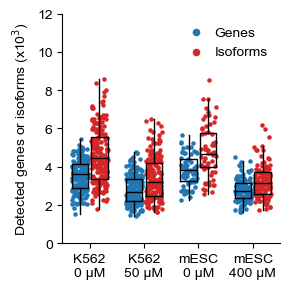

In [9]:
info = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
runs1 = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
runs2 = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]

d = info[[x in runs1 for x in info["Run"]]]
d = info
d1 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]

d = info[[x in runs2 for x in info["Run"]]]
d = info
d3 = d[(d["CellLine"] == "mESC") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d4 = d[(d["CellLine"] == "mESC") & (d["s4U"] == 400) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
print("Cells:", len(d1), len(d2), len(d3), len(d4), sep="\t")

np.random.seed(0)

ys_list_1 = [d1["Genes"], d2["Genes"], d3["Genes"], d4["Genes"]]
ys_list_2 = [d1["Isoforms.Assembled"], d2["Isoforms.Assembled"], d3["Isoforms.Assembled"], d4["Isoforms.Assembled"]]

colors = ["C7", "C3", "C7", "C3"]

color1 = "C0"
color2 = "C3"

w = 0.3
offset = 0.03

print("Median of genes:")
for ys in ys_list_1:
    print(np.median(ys))

print("Median of isoforms:")
for ys in ys_list_2:
    print(np.median(ys))
    
plt.figure(figsize=(3, 3))

for i, ys in enumerate(ys_list_1):
    ys = np.array(ys) / 1e3
    xs = np.random.random(len(ys)) * w - w/2 + i - w/2 - offset
    plt.boxplot(ys, positions=[i - w / 2 - offset], widths=w, 
                showfliers=False, showcaps=False, medianprops={"color": "black"})
    if i == 0:
        label = "Genes"
    else:
        label = None
    plt.scatter(xs, ys, s=20, marker=".", color=color1, label=label)
    
for i, ys in enumerate(ys_list_2):
    ys = np.array(ys) / 1e3
    xs = np.random.random(len(ys)) * w - w/2 + i + w/2 + offset
    plt.boxplot(ys, positions=[i + w / 2 + offset], widths=w, 
                showfliers=False, showcaps=False, medianprops={"color": "black"})
    if i == 0:
        label = "Isoforms"
    else:
        label = None
    plt.scatter(xs, ys, s=20, marker=".", color=color2, label=label)
    
plt.xticks(np.arange(4), ["K562\n0 μM", "K562\n50 μM", "mESC\n0 μM", "mESC\n400 μM"])
plt.ylabel("Detected genes or isoforms (x10$^3$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlim(-0.5, 3.5)
plt.ylim(0, 12)
plt.legend(markerscale=2, handlelength=1, ncol=1, frameon=False)
plt.tight_layout()
plt.savefig("figures/detected_genes_isoforms.pdf")

In [3]:
d = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
d1 = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["CellLine"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d3 = d[(d["CellLine"] == "mESC") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d4 = d[(d["CellLine"] == "mESC") & (d["s4U"] == 400) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]

array = [
    ["K562.0uM.3h", d1],
    ["K562.50uM.3h", d2],
    ["mESC.0uM.3h", d3],
    ["mESC.400uM.3h", d4]]

for name, d in array:
    print("-" * 80)
    print("%s (%d cells)" % (name, len(d)))
    print("Median of reads: %s" % format(int(np.median(d["FilteredClip.Reads"])), ","))
    print("Median of UMIs: %s" % format(int(np.median(d["UMIs"])), ","))
    print("Meidna of genes: %s" % (format(int(np.median(d["Genes"])), ",")))
    print("Median of UMIs (reads ≥ 2): %s" % format(int(np.median(d["UMIs.2Reads"])), ","))
    print("Meidna of genes (reads ≥ 2): %s" % (format(int(np.median(d["Genes.2Reads"])), ",")))

--------------------------------------------------------------------------------
K562.0uM.3h (190 cells)
Median of reads: 211,298
Median of UMIs: 15,022
Meidna of genes: 3,615
Median of UMIs (reads ≥ 2): 8,851
Meidna of genes (reads ≥ 2): 3,008
--------------------------------------------------------------------------------
K562.50uM.3h (179 cells)
Median of reads: 208,025
Median of UMIs: 12,220
Meidna of genes: 2,702
Median of UMIs (reads ≥ 2): 7,339
Meidna of genes (reads ≥ 2): 2,287
--------------------------------------------------------------------------------
mESC.0uM.3h (64 cells)
Median of reads: 217,780
Median of UMIs: 14,726
Meidna of genes: 3,825
Median of UMIs (reads ≥ 2): 9,192
Meidna of genes (reads ≥ 2): 3,197
--------------------------------------------------------------------------------
mESC.400uM.3h (112 cells)
Median of reads: 283,352
Median of UMIs: 9,694
Meidna of genes: 2,752
Median of UMIs (reads ≥ 2): 6,138
Meidna of genes (reads ≥ 2): 2,394


## 2. Relationship between gene number and UMI number

Cells	272	64


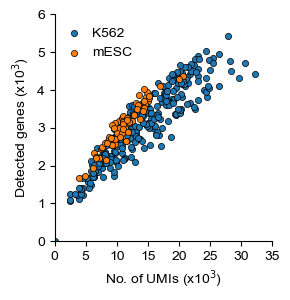

In [12]:
info = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")

runs1 = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
runs2 = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]

d = info[[x in runs1 for x in info["Run"]]]
d1 = d[(d["CellLine"] == "K562") & (d["s4U"].isin([0, 50])) & (d["Time"] == 3) & (d["ActD"].isna())]

d = info[[x in runs2 for x in info["Run"]]]
d2 = d[(d["CellLine"] == "mESC") & (d["s4U"].isin([0, 400])) & (d["Time"] == 3) & (d["ActD"].isna())]

print("Cells", len(d1), len(d2), sep="\t")

plt.figure(figsize=(3, 3.1))
for strain in ["K562", "mESC"]:
    if strain == "K562":
        tmp = d1
    else:
        tmp = d2
    xs = tmp["UMIs"] / 1e3
    ys = tmp["Genes"] / 1e3
    plt.scatter(xs, ys, lw=0.5, s=20, edgecolor="black", label=strain, alpha=1)
plt.xlabel("No. of UMIs (x10$^3$)")
plt.ylabel("Detected genes (x10$^3$)")
plt.xlim(0, 35)
plt.ylim(0, 6)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig("figures/umis_and_genes.pdf")